In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sms_raw = pd.read_csv('SPAM.csv',delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [4]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Adding a space around key so we get words and not just pattern matching 
    sms_raw[str(key)] = sms_raw.message.str.contains(
    '' + str(key) + '',
    case=False
    )

In [5]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [6]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

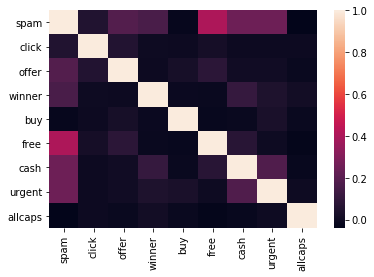

In [7]:
sns.heatmap(sms_raw.corr())

In [8]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 501


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4731,   94],
       [ 407,  340]], dtype=int64)

In [11]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.9040358744394619
Testing on Sample: 0.9100861450107681


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.91218638, 0.91039427, 0.91935484, 0.91397849, 0.91756272,
       0.91382406, 0.8940754 , 0.9028777 , 0.90827338, 0.90467626])